In [1]:
import json
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
import matplotlib.pyplot as plt
# plt.rc('font', family='Libertine')
rc_fonts = {
    "font.family": "serif",
    "font.size": 20,
    'figure.figsize': (5, 3),
    "text.usetex": True,
    'text.latex.preview': True,
    'text.latex.preamble': [
        r"""
        \usepackage{libertine}
        \usepackage[libertine]{newtxmath}
        """],
}

In [3]:
query_file1 = 'val_qid_label2.json'
query_file2 = 'train_qid_label2.json'
query_file3 = 'test_qid_label2.json'
data_file1 = f"{query_file1[:query_file1.index('_')]}.txt"
data_file2 = f"{query_file2[:query_file2.index('_')]}.txt"
data_file3 = f"{query_file3[:query_file3.index('_')]}.txt"

In [4]:
def return_statistics(query_file, data_file):
    with open(query_file, 'r') as f:
        query_to_qid = json.load(f)
    all_data = []
    statistics = {}
    positve_cases = set()
    negative_cases = set()
    with open(data_file, 'r') as f:
        lines = f.readlines()
        for l in lines:
            data = l.split()
            key_to_value = {c.split(":")[0]:c.split(":")[1] for c in data[1:]}
            key_to_value['label'] = int(data[0])
            if key_to_value['qid'] in statistics:
                s = statistics[key_to_value['qid']]
            else:
                s = {'number': 0, 'positive': 0, 'negative': 0}
                statistics[key_to_value['qid']] = s
            s['number'] += 1
            if int(key_to_value['label']) == 1:
                s['positive'] += 1
                positve_cases.add(key_to_value['qid'])
            else:
                s['negative'] += 1
                negative_cases.add(key_to_value['qid'])
            all_data.append(key_to_value)

    both = list(positve_cases.intersection(negative_cases))
    for k, v in statistics.items():
        if 'positive' in v:
            if 'negative' in v:
                v['pp'] = v['positive'] / (v['negative']+ v['positive'])
            else:
                v['pp'] = 1
        else:
            v['pp'] = 0
    return statistics, all_data

In [22]:
statistics_test

{'10000000': {'number': 12, 'positive': 6, 'negative': 6, 'pp': 0.5},
 '10000001': {'number': 3, 'positive': 3, 'negative': 0, 'pp': 1.0},
 '10000002': {'number': 5, 'positive': 5, 'negative': 0, 'pp': 1.0},
 '10000003': {'number': 1, 'positive': 1, 'negative': 0, 'pp': 1.0},
 '10000004': {'number': 2, 'positive': 2, 'negative': 0, 'pp': 1.0},
 '10000005': {'number': 2, 'positive': 2, 'negative': 0, 'pp': 1.0},
 '10000006': {'number': 3,
  'positive': 1,
  'negative': 2,
  'pp': 0.3333333333333333},
 '10000007': {'number': 3, 'positive': 3, 'negative': 0, 'pp': 1.0},
 '10000008': {'number': 2, 'positive': 1, 'negative': 1, 'pp': 0.5},
 '10000009': {'number': 4, 'positive': 2, 'negative': 2, 'pp': 0.5},
 '10000010': {'number': 3,
  'positive': 1,
  'negative': 2,
  'pp': 0.3333333333333333},
 '10000011': {'number': 5, 'positive': 1, 'negative': 4, 'pp': 0.2},
 '10000012': {'number': 1, 'positive': 1, 'negative': 0, 'pp': 1.0},
 '10000013': {'number': 1, 'positive': 1, 'negative': 0, 'pp

In [5]:
statistics_val, all_val = return_statistics(query_file1, data_file1)
statistics_train, all_train = return_statistics(query_file2, data_file2)
statistics_test, all_test = return_statistics(query_file3, data_file3)

In [6]:
values_A_num = [v['number'] for k, v in statistics_val.items()] + [v['number'] for k, v in statistics_train.items()]
values_C_num = [v['number'] for k, v in statistics_test.items()]
values_A_pp = [v['pp'] for k, v in statistics_val.items()] + [v['pp'] for k, v in statistics_train.items()]
values_C_pp = [v['pp'] for k, v in statistics_test.items()]
bins = np.arange(0,15,2)

/tmp/ipykernel_555154/2182095438.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(xlabels1)


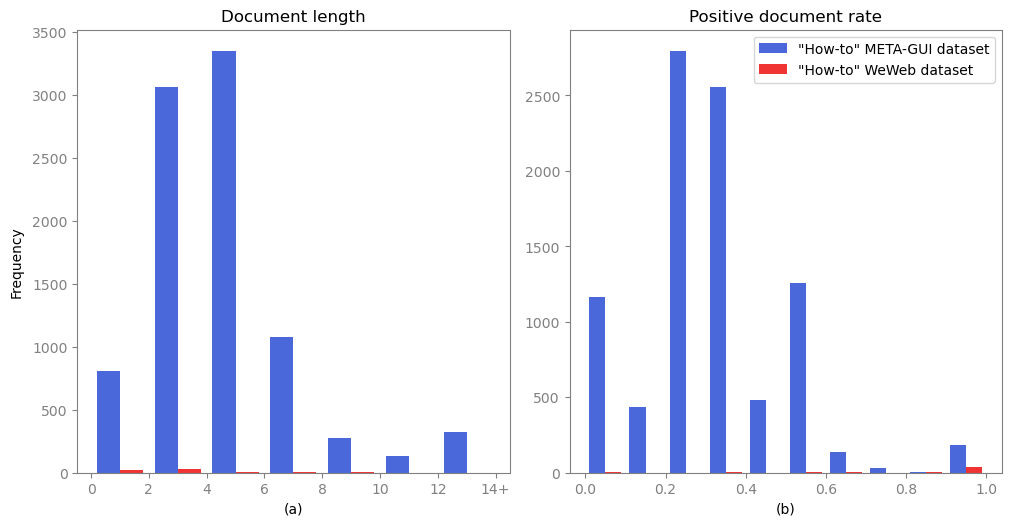

In [7]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
_, bins1, patches1 = ax1.hist([np.clip(values_A_num, bins[0], bins[-1]), np.clip(values_C_num, bins[0], bins[-1])],
          bins=bins, color=['#4a68d9', '#f03434', ], label=['\"How-to\" META-GUI dataset', '\"How-to\" WeWeb dataset'])
_, bins2, patches2 = ax2.hist([values_A_pp, values_C_pp], color=['#4a68d9', '#f03434',], label=['\"How-to\" META-GUI dataset', '\"How-to\" WeWeb dataset'])
# Set common labels
fig.text(0, 0.5, 'Frequency', ha='center', va='center', rotation='vertical')
fig.tight_layout()
ax1.tick_params(color='gray', labelcolor='gray')
for spine in ax1.spines.values():
        spine.set_edgecolor('gray')
ax2.tick_params(color='gray', labelcolor='gray')
for spine in ax2.spines.values():
        spine.set_edgecolor('gray')
xlabels1 = bins1.astype(int).astype(str)
xlabels1[-1] += '+'
xlabels1 = np.insert(xlabels1, 0, 0)
ax1.set_xticklabels(xlabels1)
# xlabels2 = bins2[1:].astype(int).astype(str)
# xlabels2[-1] += '+'
# xlabels2 = np.insert(xlabels2, 0, 0)
# ax2.set_xticklabels(xlabels2)

ax1.set_xlabel('(a)')
ax2.set_xlabel('(b)')
ax1.set_title('Document length')
ax2.set_title('Positive document rate')
plt.legend(loc='upper right')
plt.savefig('query_distribution.pdf', bbox_inches="tight")

[None, None, None, None, None, None, None, None, None, None]

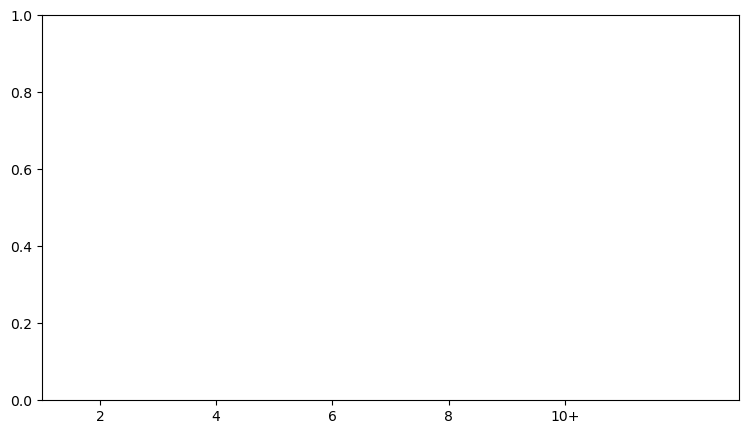

In [8]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(1)
values_A_num = [v['number'] for k, v in statistics_val.items()] + [v['number'] for k, v in statistics_train.items()]
values_C_num = [v['number'] for k, v in statistics_test.items()]

bins = np.arange(0,12,2)

fig, ax = plt.subplots(figsize=(9, 5))
_, bins, patches = ax1.hist([np.clip(values_A_num, bins[0], bins[-1]),
                             np.clip(values_C_num, bins[0], bins[-1])],
                            bins=bins, color=['#3782CC', 'r'], label=['How-to META-GUI', 'How-to WeWeb'])

xlabels = bins[1:].astype(int).astype(str)
xlabels[-1] += '+'

N_labels = len(xlabels)
plt.xlim([0, 12])
plt.xticks(2 * np.arange(N_labels) + 1)
ax.set_xticklabels(xlabels)

plt.setp(patches, linewidth=0)
# plt.legend(loc='upper right')

# plt.savefig('query_length_distribution.pdf')

In [9]:
number_columns = [str(i) for i in range(1, 19)]
ground_truth_df = pd.DataFrame()
for r in all_test:
    ground_truth_df = pd.concat([ground_truth_df, pd.DataFrame([r])], ignore_index=True)

In [10]:
corrM = ground_truth_df[number_columns].corr()

In [11]:
ground_truth_df[number_columns]

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.28,1.0,0.111111,1.0,0.0,0.0,0.0,0.0,0.333333,0,1,0.333333,0.047619,0.0,0.142857,0.006803,0.0,0.0
1,0.0,1.0,0.111111,0.5,0.1125,0.0,0.25,0.0125,1.0,1,1,0,0.302914,0.090909,0.384615,0.013178,0.4375,0.0625
2,0.146341,1.0,0.166667,0.5,0.0,0.0,0.0,0.0,0.5,0,1,0.5,0.019231,0.0,0.038462,0.00074,0.0,0.0
3,0.157895,1.0,0.166667,1.0,0.171053,0.026316,0.315789,0.041898,1.0,1,1,0,0.242424,0.090909,0.363636,0.019284,0.289474,0.131579
4,0.105263,1.0,0.055556,1.0,0.210526,0.105263,0.315789,0.022161,1.0,1,1,0,0.219114,0.090909,0.384615,0.022609,0.578947,0.368421
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,0.0,0.8,0.055556,1.0,0.15,0.1,0.2,0.003333,0.6,0,1,0.3,0.133333,0.0,0.333333,0.022917,0.7,0.5
164,0.113636,0.7,0.111111,0.5,0.056818,0.045455,0.068182,0.000258,0.666667,0,1,0.333333,0.138889,0.0,0.333333,0.030093,0.431818,0.0
165,0.333333,0.9,0.055556,1.0,0.185185,0.125,0.333333,0.006125,0.9,0,1,0.1,0.206987,0.0,1.0,0.083648,0.958333,0.541667
166,0.176471,1.0,0.055556,0.75,0.235294,0.176471,0.352941,0.005383,0.909091,0,1,0.090909,0.16588,0.0,1.0,0.078782,0.941176,0.764706


In [12]:
def correlation_matrix(df):
    from matplotlib import pyplot as plt
    from matplotlib import cm as cm

    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    cmap = cm.get_cmap('jet', 30)
    cax = ax1.imshow(df.corr(), interpolation="nearest", cmap=cmap)
    ax1.grid(True)
    plt.title('Abalone Feature Correlation')
    labels=number_columns
    ax1.set_xticklabels(labels,fontsize=6)
    ax1.set_yticklabels(labels,fontsize=6)
    # Add colorbar, make sure to specify tick locations to match desired ticklabels
    fig.colorbar(cax, ticks=[.75,.8,.85,.90,.95,1])
    plt.show()

In [13]:
feature_df = ground_truth_df[number_columns]
feature_df = feature_df.astype({"1": float, "2": float, "3": float, "4": float, 
               "5": float, "6": float, "7": float, "8": float,
               "9": float, "10": float, "11": float, "12": float,
               "13": float, "14": float, "15": float, "16": float,
               "17": float, "18": float})
target_dict = {str(i):f"F{i}" for i in range(1, 19)}
feature_df = feature_df.rename(columns=target_dict)

/tmp/ipykernel_555154/623267134.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(labels,fontsize=6)
/tmp/ipykernel_555154/623267134.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(labels,fontsize=6)


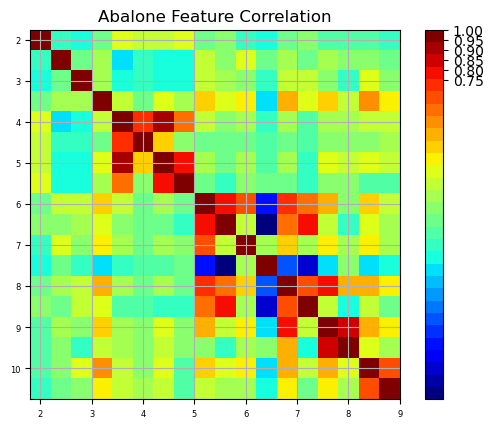

In [14]:
correlation_matrix(feature_df)

In [15]:
len(number_columns)

18

In [16]:
feature_df.corr()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,F17,F18
F1,1.000000,-0.062595,-0.169153,0.066691,0.298105,0.260486,0.230870,0.277785,0.023217,0.118806,-0.099493,-0.140996,0.024150,0.109830,-0.022179,-0.014446,-0.036352,-0.084969
F2,-0.062595,1.000000,0.041753,0.170977,-0.185076,-0.087905,-0.133413,-0.109688,0.238080,0.088651,0.319501,0.024093,0.168998,0.067341,0.176499,0.092367,0.118846,0.048261
F3,-0.169153,0.041753,1.000000,0.197133,-0.138173,-0.079348,-0.149889,-0.131076,0.208863,0.175311,0.123299,-0.108005,0.241997,0.215503,0.103743,-0.069112,0.284204,0.137529
F4,0.066691,0.170977,0.197133,1.000000,0.242074,0.071659,0.300518,0.178005,0.407385,0.282549,0.364953,-0.204526,0.479208,0.282508,0.406722,0.231378,0.546698,0.338811
F5,0.298105,-0.185076,-0.138173,0.242074,1.000000,0.707441,0.883257,0.602711,0.199640,0.085355,0.146051,-0.060627,0.157348,0.002814,0.190002,0.157911,0.244707,0.242972
F6,0.260486,-0.087905,-0.079348,0.071659,0.707441,1.000000,0.430584,0.094719,0.070039,0.028155,0.026482,-0.018290,0.049862,0.007785,0.091608,0.084138,0.120080,0.156521
F7,0.230870,-0.133413,-0.149889,0.300518,0.883257,0.430584,1.000000,0.792203,0.178612,0.018917,0.180917,-0.024558,0.173519,-0.059282,0.276187,0.237437,0.276192,0.230560
F8,0.277785,-0.109688,-0.131076,0.178005,0.602711,0.094719,0.792203,1.000000,0.055926,-0.064198,0.079181,0.066645,0.031629,-0.084032,0.090274,0.127798,0.011034,-0.041043
F9,0.023217,0.238080,0.208863,0.407385,0.199640,0.070039,0.178612,0.055926,1.000000,0.768164,0.653628,-0.547224,0.700274,0.620685,0.446558,0.131068,0.421273,0.248488
F10,0.118806,0.088651,0.175311,0.282549,0.085355,0.028155,0.018917,-0.064198,0.768164,1.000000,0.229416,-0.847960,0.581752,0.808011,0.211986,-0.106222,0.276530,0.142254


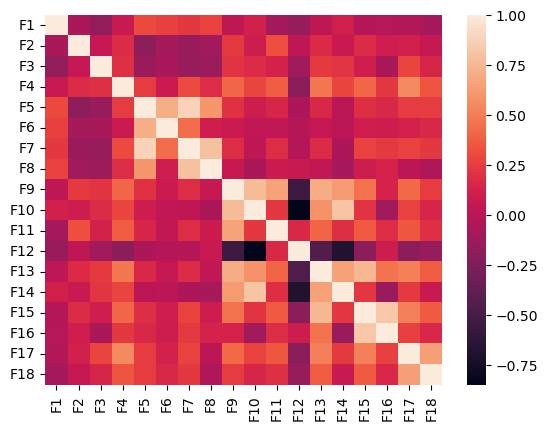

In [17]:
sns.heatmap(feature_df.corr());

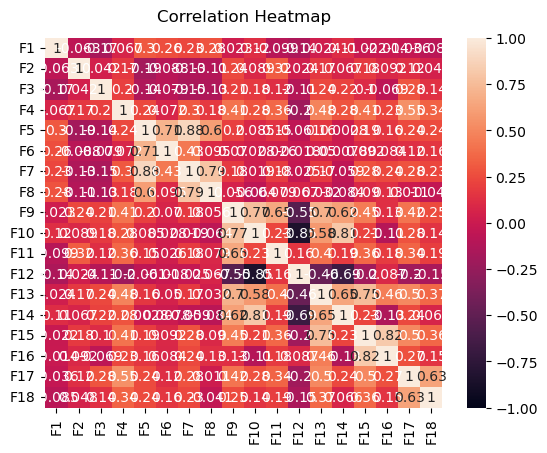

In [18]:
# plt.figure(figsize=(12, 12))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(feature_df.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

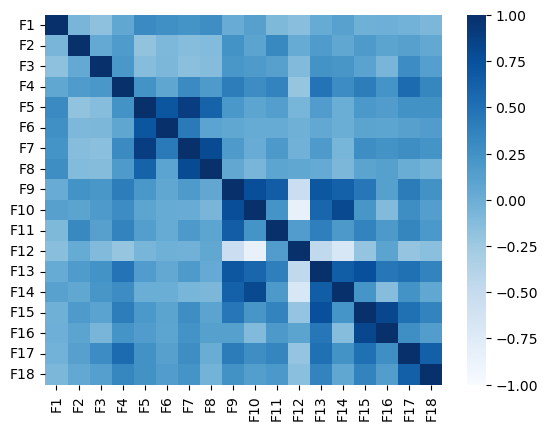

In [19]:
# plt.figure(figsize=(12, 12))
# heatmap = sns.heatmap(feature_df.corr(), vmin=-1, vmax=1, annot=True, cmap='Blues')
# heatmap.set_title('Feature correlation heatmap', fontdict={'fontsize':12}, pad=12)
# # save heatmap as .png file
# # dpi - sets the resolution of the saved image in dots/inches
# # bbox_inches - when set to 'tight' - does not allow the labels to be cropped
# # plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')
# # create seabvorn heatmap with required labels
# sns.heatmap('feature_correlation_heatmap.pdf', bbox_inches="tight")
# # s.set(xlabel='X-Axis', ylabel='Y-Axis')

# plt.figure(figsize=(8, 8))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(feature_df.corr(), vmin=-1, vmax=1, cmap='Blues')
# heatmap.set_title('Feature correlation')
plt.savefig('feature_correlation.pdf', bbox_inches="tight")